In [2]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

# Prior

Area under the unnormalized prior curve: 400.02000000000004


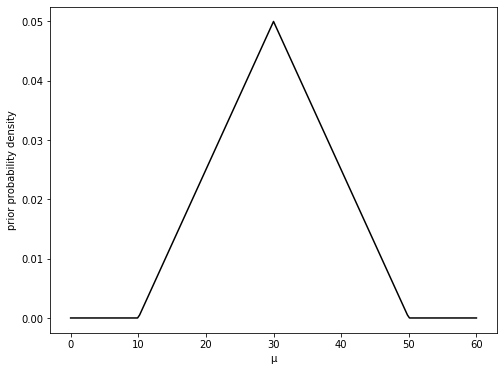

In [3]:
# mu is the average height, which we don't know and want to infer from data.
# We create an array of possible values between 0 and 60.
mu = np.linspace(0, 60, 201)

# Remember the unnormalized values
unnormalized_prior = np.where(
    mu > 10,
    np.where(
        mu < 30, mu - 10,
        np.where(
            mu < 50, 50 - mu, 0)),
    0)

# Use the trapezoid rule to compute the integral of the unnormalized prior
area = sp.integrate.trapz(unnormalized_prior, mu)
print('Area under the unnormalized prior curve:', area)

# Normalize the prior
prior = unnormalized_prior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black')
plt.xlabel('μ')
plt.ylabel('prior probability density')
plt.show()

# Likelihood

In [ ]:
# Exponential distribution with maximum likelihood fit to the data
lambda_ = 1 / np.mean(waiting_times_hour)
distribution = sts.expon(scale=1/lambda_)


# Exponential distribution with maximum likelihood fit to the data
lambda_ = 1 / np.mean(waiting_times_hour)
distribution = sts.expon(scale=1/lambda_)

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
x = np.linspace(0, max(waiting_times_hour), 200)
y = distribution.pdf(x)
plt.plot(x, y)
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Density')
plt.title(f'Fit of maximum likelihood estimate to the data for hour {hour_index}')
plt.show()

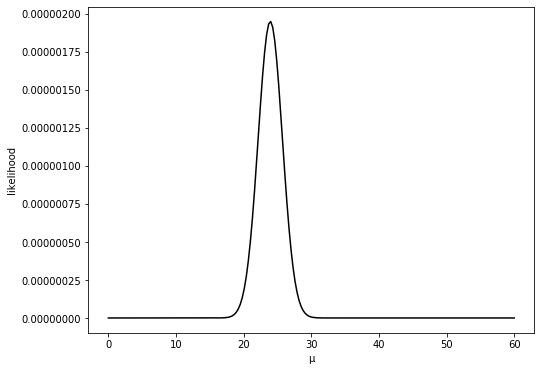

In [4]:
data = [20, 27, 23.5, 28.2, 21]
# Parameters of the truncated normal pdf
sigma = 4
lower_limit = 0
upper_limit = np.inf
likelihood = 1
for i in data:
    likelihood = likelihood * sts.truncnorm.pdf(
    i,
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)
    
plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood, color='black')
plt.xlabel('μ')
plt.ylabel('likelihood')
plt.show()

# Posterior

Normalization constant of posterior: 3.0485634701116535e-07


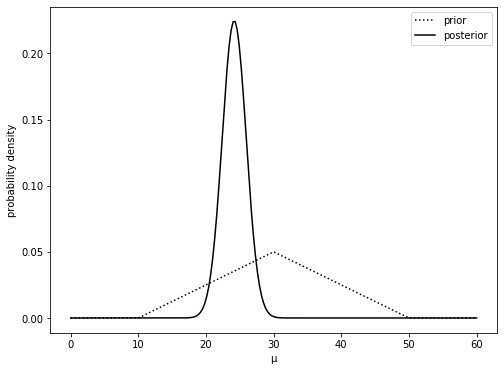

In [5]:
unnormalized_posterior = prior * likelihood

area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)

posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

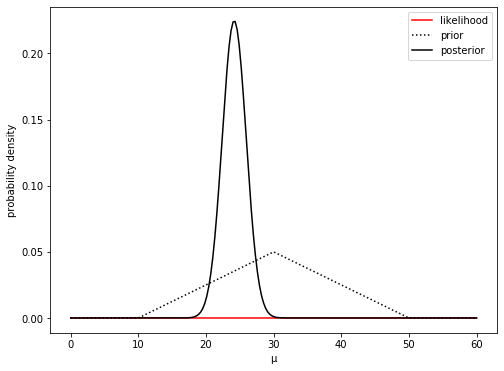

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()